# **NYC Taxi & Limousine Commision (TLC) Trip Record**

# **Introduction**

**Latar Belakang**

Mobilitas masyarakat di kota New York City sangat bergantung pada layanan transportasi umum, salah satunya adalah taksi. NYC Taxi and Limousine Commision (TLC) merupakan salah satu transportasi yang menawarkan alternatif yang fleksibel bagi warga maupun wartawan. Setiap harinya, ribuan perjalanan taksi tercatat dan menghasilkan data yang kaya akan informasi, mulai dari waktu perjalanan, lokasi penjemputan dan penurunan, hingga rincian biaya dan metode pembayaran. 

Data perjalanan taksi dapat memberikan gambaran yang komprehensif mengenai pola pergerakan masyarakat, kebutuhan transportasi di waktu-waktu tertentu, serta efektivitas layanan dari berbagai vendor. Dengan memahami pola ini, perusahaan taksi dapat membuat keputusan berbasis data untuk meningkatkan efisiensi operasional dan pengalaman pelanggan.

Dataset yang digunakan dalam analisis ini berisi lebih dari 68 ribu catatan perjalanan taksi di NYC. Informasi yang tersedia meliputi waktu tempuh, jarak perjalanan, lokasi pickup dan dropoff, serta rincian biaya seperti tarif dasar perjalanan, tip, dan tarif lainnya. Data ini menjadi dasar untuk mengevaluasi kinerja vendor, mengidentifikasi waktu dan lokasi dengan permintaan tinggi, serta memahami faktor-faktor yang mempengaruhi total biaya perjalanan.

Melalui analisis mendalam terhadap data ini, diharapkan dapat ditemukan insight yang berguna untuk merumuskan strategi bisnis yang lebih adaptif, termasuk pengaturan armada, penyesuaian tarif, serta perencanaan layanan yang lebih responsif terhadap kebutuhan pengguna. 

**Pertanyaan Utama**
* Bagaimana pola perjalanan taksi berdasarkan waktu dan lokasi?
* Bagaimana efisiensi vendor dalam menghasilkan pendapatan?
* Bagaimana faktor-faktor yang ada mempengaruhi total biaya perjalanan?

**Tujuan Analisis**
* **Mengidentifikasi Pola Perjalanan Taksi di NYC**
    * Menganalisis pola perjalanan berdasarkan waktu dan lokasi.
    * Mengidentifikasi zona sibuk untuk pickup dan drop-off.

* **Menilai Efisiensi Vendor dalam Menghasilkan Pendapatan**
    * Membandingkan jumlah perjalanan dan total pendapatan dari masing-masing vendor.
    * Menilai vendor mana yang lebih efisien dalam pendapatan per perjalanan.

* **Menganalisis Faktor yang Mempengaruhi Biaya Perjalanan**
    * Mengukur hubungan antara jarak perjalanan, jumlah penumpang, biaya dasar perjalanan, biaya tambahan, biaya toll, tip, biaya kemacetan, dan total biaya.
    * Menganalisis pengaruh tip, surcharge, dan metode pembayaran terhadap biaya total.


# **Import Libraries**

In [2]:
# import library yang diperlukan
import pandas as pd
import numpy as np
import geopandas as gpd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import missingno as msno
from matplotlib import cm

import warnings
warnings.filterwarnings("ignore")

In [3]:
# pip install missingno

# **Import Dataset**

Dataset yang digunakan ada dua, yaitu:

* **NYC TLC Trip Record**: berisi detail perjalanan, termasuk vendor, lokasi pickup dan drop-off (dalam ID), jumlah penumpang, jarak perjalanan, tarif, tip, dan metode pembayaran.

* **Taxi Zone Lookup**: berisi informasi tambahan tentang zona berdasarkan ID lokasi dan wilayah administratif (borough).

Dataset ini berisi informasi tentang New York City Taxi & Limousin (TLC) Trip Record. Dataset ini berisi 18 kolom, yaitu:
* VendorID: ID yang menunjukkan penyedia LPEP yang mencatat data perjalanan. 
    * 1 : Creative Mobile Technologies, LLC.
    * 2 : VeriFone Inc.
* lpep_pickup_datetime: waktu dan tanggal saat meteran taksi mulai berjalan.
* lpep_dropoff_datetime: waktu dan tanggal saat meteran taksi berhenti.
* passenger_count: jarak tempuh dalam mil yang dicatat oleh alat pengukur (taksi meter).
* PULocationID: ID zona taksi TLC tempat penumpang naik (lokasi awal perjalanan).
* DOLocationID: ID zona taksi TLC tempat penumpang turun (lokasi akhir perjalanan).
* RatecodeID: ID tarif akhir yang berlaku pada akhir perjalanan
  * 1 : tarif standar
  * 2 : tarif ke bandara JFK
  * 3 : tarif ke bandara Newark
  * 4 : tarif ke Nassau atau Westchester
  * 5 : tarif negosiasi
  * 6 : tarif perjalanan kelompok
* store_and_fwd_flag: indikator apakah catatan perjalanan disimpan sementara dalam memori kendaraan sebelum dikirim ke penyedia layanan, karena kendaraan tidak memiliki koneksi ke server pada saat itu.
  * Y : perjalanan disimpan dan diteruskan kemudian.
  * N : perjalanan dikirim langsung tanpa perlu disimpan.
* payment_type: kode numerik yang menunjukkan metode pembayaran penumpang untuk perjalanan:
  * 1 : kartu kredit
  * 2 : tunai
  * 3 : tidak dikenakan biaya
  * 4 : perselisihan
  * 5 : tidak diketahui
  * 6 : perjalanan dibatalkan
* fare_amount: tarif perjalanan dihitung berdasarkan jarak dan waktu menggunakan meteran taksi. Termasuk biaya tambahan seperti biaya jam sibuk ($0.50) dan biaya perjalanan larut malam ($1).
* mta_tax: pajak MTA sebesar $0.50 yang dikenakan secara otomatis berdasarkan tarif meteran yang digunakan.
* improvement_surcharge: biaya tambahan perbaikan sebesar $0.30 yang dikenakan pada perjalanan yang dihentikan di jalan. Biaya ini mulai berlaku sejak tahun 2015.
* tip_amount: jumlah tip yang secara otomatis dicatat untuk pembayaran dengan kartu kredit. Tip tunai tidak termasuk dalam catatan ini.
* tolls_amount: total jumlah biaya tol yang dibayarkan dalam perjalanan.
* total_amount: total biaya yang dikenakan kepada penumpang, tidak termasuk tip tunai.
* trip_type: kode yang menunjukkan apakah perjalanan dilakukan dengan metode hentikan taksi di jalan (street-hail) atau melalui pemesanan (dispatch)
  * 1 : street-hail 
  * 2 : dispatch
* congestion_surcharge: tarif tambahan ketika ada kemacetan. Jika terjadi kemacetan (2.75), jika tidak (0.00)

In [4]:
data = pd.read_csv('NYC TLC Trip Record.csv')
data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


**Data Understanding**

In [5]:
# melihat informasi dataset
print(f'Jumlah baris dan kolom di dataset df adalah {data.shape}')
data.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [6]:
# deskripsi data
display(data.describe(), data.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


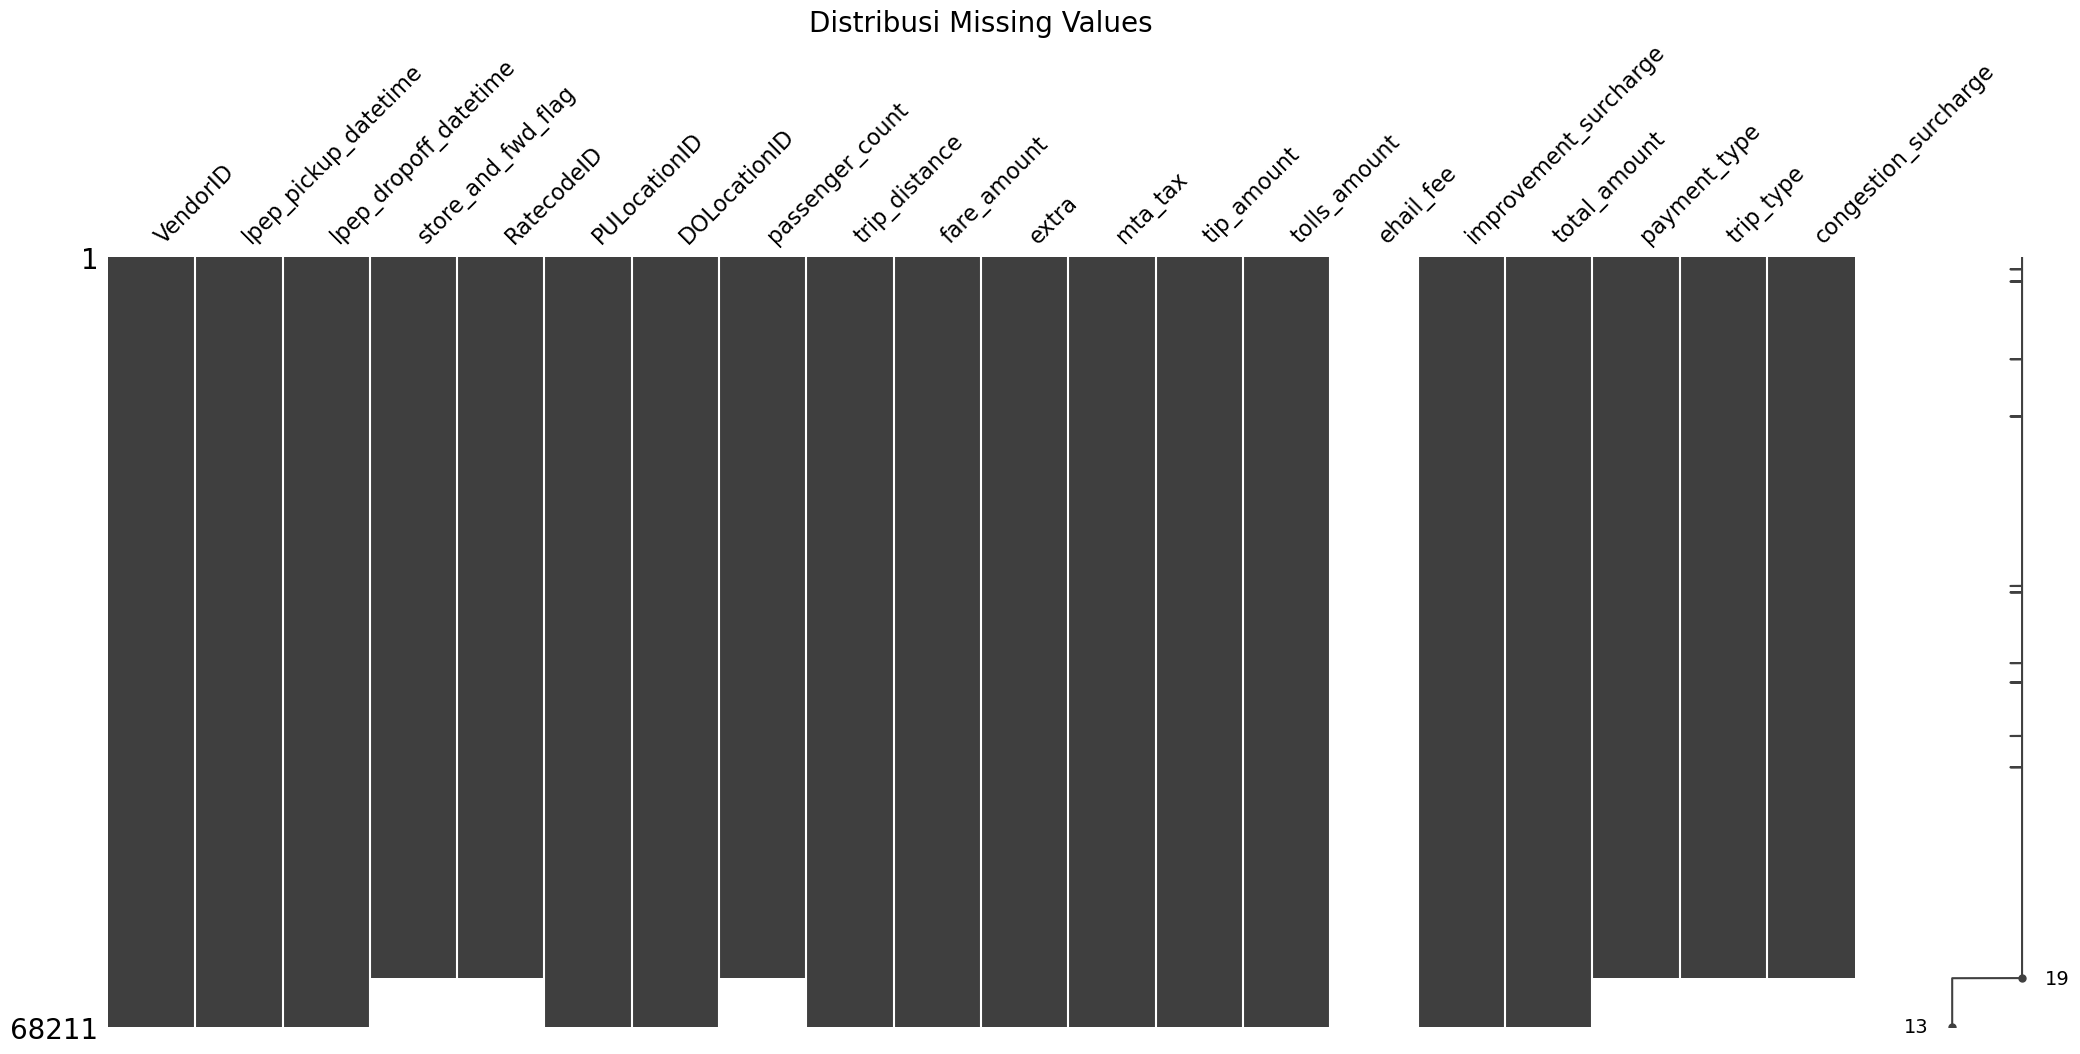

In [7]:
msno.matrix(data)
plt.title('Distribusi Missing Values', size = 20)
plt.show()

dengan melihat distribusi missing value diatas, bisa disimpulkan bahwa seluruh nilai kosong berada pada baris yang sama, sehingga seluruh baris yang berisi nilai-nilai kosong tersebut dapat dihapus saat melakukan pembersihan data. 

In [8]:
data.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

terdapat beberapa kolom seperti `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `ehail_fee`, `payment_type`, `tip_type`, `congestion_surcharge` memiliki data kosong. data NaN tersebut berjumlah sekitar 4324 data kecuali `ehail_fee` yang seluruhnya merupakan data NaN.

In [9]:
data.duplicated().sum()

0

dari semua data yang ada, tidak ada data yang duplikat.

**Dataset tambahan**

data ini berisi data tambahan yang memuat lokasi dari PULocationID dan DOLocationID, yang diperoleh dari [NYC Open Data.](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)


In [10]:
zone = pd.read_csv('taxi_zone_lookup.csv')
zone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


**Data understanding dataset tambahan**

In [11]:
# melihat informasi dataset
print(f'Jumlah baris dan kolom di dataset df adalah {zone.shape}')
zone.info()

Jumlah baris dan kolom di dataset df adalah (265, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [12]:
zone.isna().sum()

LocationID      0
Borough         1
Zone            1
service_zone    2
dtype: int64

terdapat beberapa kolom yang memiliki data kosong, seperti `borough`, `zone`, dan `service_zone` yang akan ditangani. lalu, akan dibuat sebuah dataframe baru yang berisi data `zone` digabungkan dengan data `df` untuk mendapatkan sebuah data baru yang berguna untuk visualisasi.

**Merge data**

In [13]:
# Merge dengan PULocationID untuk mendapatkan pickup_zone dan pickup_borough
df = data.merge(zone, left_on="PULocationID", right_on="LocationID", how="left", suffixes=('_drop', '_pick'))
df = df.rename(columns={"Zone": "pickup_zone", "Borough": "pickup_borough"})
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID,pickup_borough,pickup_zone,service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,NaN,1.0,24.18,1.0,1.0,2.75,166,Manhattan,Morningside Heights,Boro Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,NaN,1.0,15.84,1.0,1.0,0.00,24,Manhattan,Bloomingdale,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,NaN,1.0,11.64,1.0,1.0,0.00,223,Queens,Steinway,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,NaN,1.0,10.20,1.0,1.0,0.00,41,Manhattan,Central Harlem,Boro Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,NaN,1.0,8.00,1.0,1.0,0.00,41,Manhattan,Central Harlem,Boro Zone


In [14]:
# Merge dengan DOLocationID untuk mendapatkan dropoff_zone dan dropoff_borough
df = df.merge(zone, left_on="DOLocationID", right_on="LocationID", how="left", suffixes=('_pick', '_drop'))
df = df.rename(columns={"Zone": "dropoff_zone", "Borough": "dropoff_borough"})
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,LocationID_pick,pickup_borough,pickup_zone,service_zone_pick,LocationID_drop,dropoff_borough,dropoff_zone,service_zone_drop
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,1.0,2.75,166,Manhattan,Morningside Heights,Boro Zone,143,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,1.0,0.00,24,Manhattan,Bloomingdale,Yellow Zone,43,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,1.0,0.00,223,Queens,Steinway,Boro Zone,179,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.0,0.00,41,Manhattan,Central Harlem,Boro Zone,238,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.0,0.00,41,Manhattan,Central Harlem,Boro Zone,74,Manhattan,East Harlem North,Boro Zone


# **Data Cleaning & Data Wrangling**

Data cleaning dan data wrangling disni dilakukan untuk kedua data yang telah digabung.

**Cek duplikasi data**

In [15]:
df.duplicated().sum()

0

**Cek missing value**

In [16]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
LocationID_pick              0
pickup_borough              66
pickup_zone                135
service_zone_pick          201
LocationID_drop              0
dropoff_borough            242
dropoff_zone               426
service_zone_drop          668
dtype: int64

In [17]:
# persentase missing value tiap kolom
for i in df.columns:
    percentage = df[i].isna().sum()/ len(df) * 100
    count = df[i].isna().sum()
    if percentage != 0 :
        print(f'{i} = {round(percentage,2)}%, {count}')

store_and_fwd_flag = 6.34%, 4324
RatecodeID = 6.34%, 4324
passenger_count = 6.34%, 4324
ehail_fee = 100.0%, 68211
payment_type = 6.34%, 4324
trip_type = 6.35%, 4334
congestion_surcharge = 6.34%, 4324
pickup_borough = 0.1%, 66
pickup_zone = 0.2%, 135
service_zone_pick = 0.29%, 201
dropoff_borough = 0.35%, 242
dropoff_zone = 0.62%, 426
service_zone_drop = 0.98%, 668


In [18]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

Secara umum, bisa dilihat bahwa:
* dataset NYC TLC Trip Record memiliki 68211 dan 28 kolom. 
* kolom-kolom dan baris-baris yang berisi nilai NaN akan ditangani dengan dihapus. 
* kolom `RatecodeID` terdapat anomali data (outlier), yaitu nilai `99` yang nantinya akan dilihat kembali setelah proses pembersihan.
* kolom-kolom yang memiliki nilai invalid juga akan ditangani.
* terdapat nilai negatif pada `extra`, `mta_tax`, `improvement_surcharge`, `congestion_surcharge`. nantinya juga akan dicek kembali kolom-kolom lain yang kemungkinan memiliki nilai negatif, terutama pada kolom-kolom yang melibatkan pembayaran. keterkaitannya juga akan dicek. 
* kolom `ehail_fee` tidak berisi apapun. selanjutnya akan dihapus semuanya.
* ubah tipe data pada kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` menjadi datetime.
* memastikan data dalam kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` sesuai dengan data yang diinginkan. jika ada yang anomali data tersebut akan dihapus.
* akan dibuat sebuah kolom baru yang diberi nama `trip_duration` yang diambil dari selisih `lpep_dropoff_datetime` dan `lpep_pickup_datetime` dalam satuan menit.
* cek deskripsi data.
* cek distribusi data dan cek apakah memiliki outlier.
* akan dibuat kolom-kolom yang berisi informasi datetime.
* akan dilakukan konversi numerik ke kategorik yang akan memudahkan visualisasi.


**Menghapus data yang tidak diperlukan**

In [19]:
# hapus kolom yang isinya nilai null dan kolom yang kemungkinan tidak digunakan
df = df.drop(columns=['ehail_fee', 'store_and_fwd_flag', 'LocationID_pick', 'LocationID_drop'])

In [ ]:
# hapus baris yang isinya missing value
df = df.dropna(axis=0)

In [21]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,total_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,service_zone_pick,dropoff_borough,dropoff_zone,service_zone_drop
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.9,1.0,...,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.7,1.0,...,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1.0,0.00,7.2,1.0,...,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.5,0.5,...,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.0,0.5,...,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,5.0,130,205,1.0,2.75,15.0,0.0,...,17.30,1.0,2.0,0.00,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,1.0,65,181,1.0,2.44,13.5,1.0,...,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,1.0,244,116,1.0,1.40,9.3,1.0,...,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,1.0,74,238,1.0,2.47,13.5,1.0,...,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone


kolom-kolom yang tidak terpakai dan baris-baris yang berisi nilai kosong telah dihapus.

**Cek anomali `RatecodeID`**

In [22]:
# cek anomali pada kolom `RatecodeID`
df['RatecodeID'].unique()

array([1., 5., 3., 2., 4.])

nilai anomali, yaitu `99` sudah tidak muncul lagi.

**Handle nilai-nilai yang invalid pada kolom `passenger_count`**

In [23]:
# cek nilai unik pada `passenger_count`
df['passenger_count'].unique()

array([1., 2., 4., 3., 6., 5., 0., 8., 7., 9.])

In [24]:
# menangani nilai invalid pada kolom `passenger_count`
df['passenger_count'] = df['passenger_count'].replace(0, 1)

nilai invalid (0) pada kolom `passenger_count` sudah diganti dengan 1. ini dilakukan karena dalam sebuah perjalanan, pasti paling tidak ada 1 penumpang di dalam taksi.

**Menangani nilai negatif**

In [25]:
# cek data negatif pada kolom-kolom tertentu
negatif_values = df[['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge']] < 0
df[negatif_values.any(axis=1)]


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,total_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,service_zone_pick,dropoff_borough,dropoff_zone,service_zone_drop
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,-3.0,0.0,...,-4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1.0,0.00,-3.0,0.0,...,-4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,1.0,129,82,1.0,0.64,-8.6,-1.0,...,-11.1,3.0,1.0,0.0,Queens,Jackson Heights,Boro Zone,Queens,Elmhurst,Boro Zone
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,1.0,75,75,1.0,0.77,-4.5,0.0,...,-5.3,4.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,1.0,75,75,2.0,0.08,-3.7,0.0,...,-5.2,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63240,2,2023-01-31 18:11:43,2023-01-31 18:12:13,1.0,193,193,1.0,0.00,-3.0,-2.5,...,-7.0,3.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,1.0,130,130,3.0,0.05,-3.0,-2.5,...,-7.0,4.0,1.0,0.0,Queens,Jamaica,Boro Zone,Queens,Jamaica,Boro Zone
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,1.0,75,75,2.0,0.08,-3.0,-2.5,...,-7.0,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,1.0,74,74,1.0,0.00,-2.5,-0.5,...,-3.8,3.0,1.0,0.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem North,Boro Zone


setelah dilakukan cek nilai negatif, ternyata terdapat 174 baris dan 1 kolom tambahan, yaitu `fare_amount` yang memiliki nilai negatif. jika diperhatikan, kolom-kolom tersebut berhubungan langsung dengan `total_amount`. di mana didapatkan bahwa

`total_amount` = `fare_amount` + `extra` + `mta_tax` + `tip_amount` + ` tolls_amount` + `improvement_surcharge` + `congestion_surcharge`

maka nilai negatif tersebut akan diubah menjadi positif, karena kolom-kolom tersebut adalah kolom-kolom yang perlu dibayarkan oleh pelanggan.

In [26]:
# mengubah menjadi nilai positif untuk kolom yang berisi nilai negatif
df[['fare_amount', 'extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']] = df[['fare_amount', 'extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']].abs()
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,total_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,service_zone_pick,dropoff_borough,dropoff_zone,service_zone_drop
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.9,1.0,...,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.7,1.0,...,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1.0,0.00,7.2,1.0,...,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.5,0.5,...,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.0,0.5,...,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,5.0,130,205,1.0,2.75,15.0,0.0,...,17.30,1.0,2.0,0.00,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,1.0,65,181,1.0,2.44,13.5,1.0,...,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,1.0,244,116,1.0,1.40,9.3,1.0,...,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,1.0,74,238,1.0,2.47,13.5,1.0,...,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone


nilai-nilai yang memiliki nilai negatif telah di absolutkan sehingga sekarang semua nilai sudah bernilai positif.

**Handle nilai invalid pada kolom `trip_distance`**

In [27]:
# Ambil data valid (trip_distance > 0 dan fare_amount > 0)
valid_data = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]

In [28]:
# Hitung rata-rata harga per mil (fare per mile)
avg_fare_per_mile = valid_data['fare_amount'].sum() / valid_data['trip_distance'].sum()

In [29]:
# Estimasi trip_distance untuk data yang 0
df.loc[df['trip_distance'] == 0, 'trip_distance'] = df['fare_amount'] / avg_fare_per_mile
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,total_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,service_zone_pick,dropoff_borough,dropoff_zone,service_zone_drop
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.580000,14.9,1.0,...,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.810000,10.7,1.0,...,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1.0,1.222934,7.2,1.0,...,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.300000,6.5,0.5,...,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.100000,6.0,0.5,...,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,5.0,130,205,1.0,2.750000,15.0,0.0,...,17.30,1.0,2.0,0.00,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,1.0,65,181,1.0,2.440000,13.5,1.0,...,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,1.0,244,116,1.0,1.400000,9.3,1.0,...,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,1.0,74,238,1.0,2.470000,13.5,1.0,...,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone


nilai 0 pada `trip_distance` sudah tidak ada lagi. pada tahap ini, `trip_distance` yang sebelumnya 0 dihitung ulang menggunakan estimasi berdasarkan rata-rata harga per mil dari tiap trip lain yang valid. sehingga `trip_distance` yang sebelumnya 0 diisi dengan estimasi berdasarkan `fare_amount` masing-masing trip.

**Mengubah format datetime**

In [30]:
# melihat format datetime
df['lpep_pickup_datetime'][0]

'2023-01-01 00:26:10'

In [31]:
# convert timestamp to datetime
df[['lpep_pickup_datetime', 'lpep_dropoff_datetime']] = df[['lpep_pickup_datetime', 'lpep_dropoff_datetime']].apply(pd.to_datetime)

In [32]:
# melihat anomali data pada `lpep_pickup_datetime` dan `lpep_dropoff_datetime`
df[['lpep_pickup_datetime', 'lpep_dropoff_datetime']].sort_values(by='lpep_pickup_datetime', ascending=True)

,lpep_pickup_datetime,lpep_dropoff_datetime
17874,2009-01-01 20:21:27,2009-01-02 11:07:31
298,2022-12-09 14:10:49,2022-12-09 14:22:26
318,2022-12-09 14:55:42,2022-12-09 15:33:06
24,2023-01-01 00:01:31,2023-01-01 00:16:02
44,2023-01-01 00:04:25,2023-01-01 00:17:50
...,...,...
63844,2023-01-31 23:45:10,2023-01-31 23:54:53
63876,2023-01-31 23:53:41,2023-02-01 00:31:14
63858,2023-01-31 23:56:16,2023-02-01 00:03:16
63872,2023-01-31 23:58:23,2023-02-01 00:07:16


In [33]:
# melihat anomali data pada `lpep_pickup_datetime` dan `lpep_dropoff_datetime`
df[['lpep_pickup_datetime', 'lpep_dropoff_datetime']].sort_values(by='lpep_dropoff_datetime', ascending=True)

,lpep_pickup_datetime,lpep_dropoff_datetime
17874,2009-01-01 20:21:27,2009-01-02 11:07:31
298,2022-12-09 14:10:49,2022-12-09 14:22:26
318,2022-12-09 14:55:42,2022-12-09 15:33:06
41,2023-01-01 00:08:05,2023-01-01 00:13:26
24,2023-01-01 00:01:31,2023-01-01 00:16:02
...,...,...
62120,2023-01-31 09:02:52,2023-02-01 09:01:47
62653,2023-01-31 13:57:30,2023-02-01 10:49:04
62591,2023-01-31 13:58:22,2023-02-01 11:46:10
62510,2023-01-31 12:41:35,2023-02-01 12:05:19


dengan melakukan pengecekan yang diurutkan berdasarkan `lpep_pickup_datetime` dan `lpep_dropoff_datetime`, terdapat tahun 2009 dan tahun 2022, serta tahun 2023 tetapi bulan Februari. maka data-data yang tidak sesuai tersebut akan dihapus.

In [34]:
df = df.drop(labels=[17874, 298, 318, 25100], axis=0)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,total_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,service_zone_pick,dropoff_borough,dropoff_zone,service_zone_drop
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.580000,14.9,1.0,...,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.810000,10.7,1.0,...,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1.0,1.222934,7.2,1.0,...,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.300000,6.5,0.5,...,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.100000,6.0,0.5,...,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,5.0,130,205,1.0,2.750000,15.0,0.0,...,17.30,1.0,2.0,0.00,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,1.0,65,181,1.0,2.440000,13.5,1.0,...,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,1.0,244,116,1.0,1.400000,9.3,1.0,...,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,1.0,74,238,1.0,2.470000,13.5,1.0,...,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone


**Membuat kolom `trip_duration`**

In [35]:
# membuat kolom baru, yaitu `trip_duration`
df["trip_duration"] = (df["lpep_dropoff_datetime"] - df["lpep_pickup_datetime"]).dt.total_seconds() / 60
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,service_zone_pick,dropoff_borough,dropoff_zone,service_zone_drop,trip_duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.580000,14.9,1.0,...,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.810000,10.7,1.0,...,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,6.766667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1.0,1.222934,7.2,1.0,...,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone,6.333333
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.300000,6.5,0.5,...,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.100000,6.0,0.5,...,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone,5.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,5.0,130,205,1.0,2.750000,15.0,0.0,...,1.0,2.0,0.00,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone,7.983333
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,1.0,65,181,1.0,2.440000,13.5,1.0,...,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone,10.750000
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,1.0,244,116,1.0,1.400000,9.3,1.0,...,1.0,1.0,0.00,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone,6.016667
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,1.0,74,238,1.0,2.470000,13.5,1.0,...,1.0,1.0,2.75,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,9.533333


**Deskripsi data**

In [36]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
count,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000
mean,1.856636,1.083821,97.097559,137.055332,1.322165,2.702335,15.899337,0.890831,0.631165,2.035943,0.139344,0.955095,21.043654,1.373192,1.018138,0.734596,17.904968
std,0.350446,0.565016,59.444240,76.191891,0.976362,6.773311,12.455942,1.291785,0.359721,2.923933,0.981421,0.173607,14.313934,0.507544,0.133452,1.216706,77.049368
min,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-10.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.200000,9.000000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000,7.116667
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.900000,12.800000,0.000000,0.500000,1.460000,0.000000,1.000000,17.450000,1.000000,1.000000,0.000000,11.100000
75%,2.000000,1.000000,116.000000,216.000000,1.000000,3.200000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.300000,2.000000,1.000000,2.750000,16.816667
max,2.000000,5.000000,263.000000,263.000000,9.000000,1571.970000,490.000000,7.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000,1439.883333


**Melihat distribusi data dan outlier**

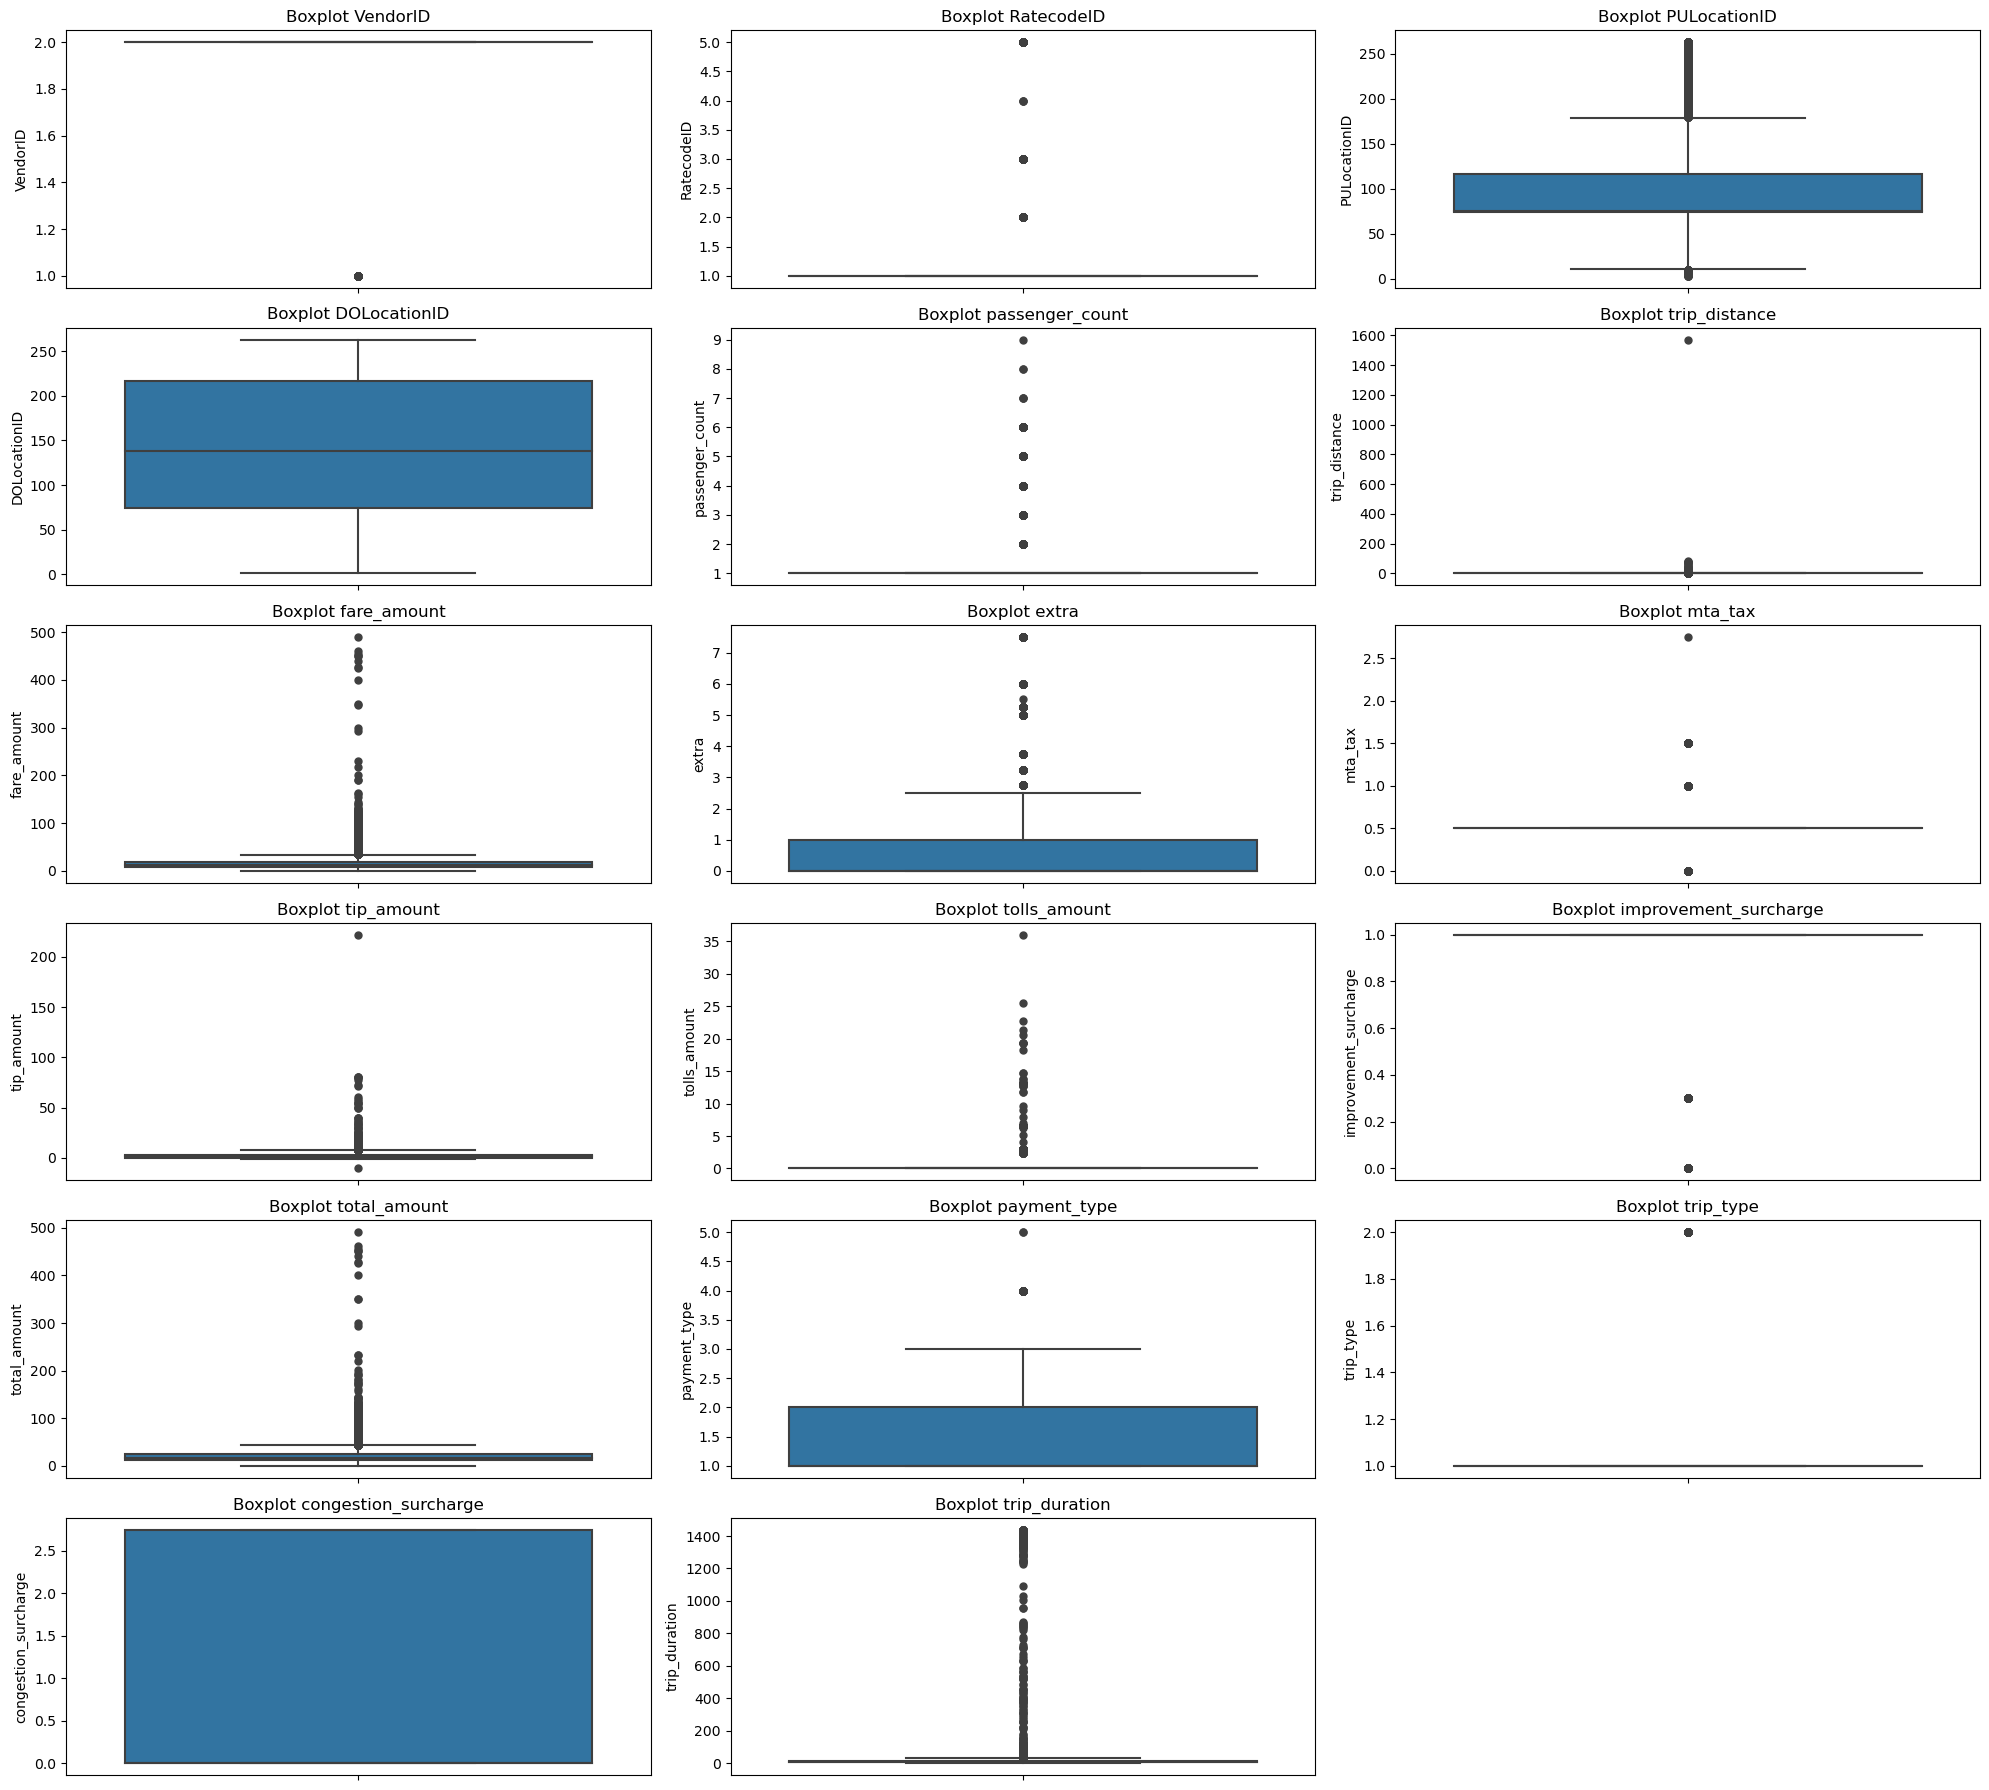

In [37]:
# Visualisasi boxplot untuk setiap kolom numerik
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(20,18))
flierprops = dict(marker='o')
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.boxplot(y=df[col], flierprops=flierprops)
    plt.title(f'Boxplot {col}')
    plt.tight_layout()
plt.show()

 jika dilihat dari boxplot untuk setiap variabel diatas, hampir semua variabel memiliki outlier. terutama variabel-variabel numerik seperti `trip_distance`, `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, `trip_duration`. hal ini bisa terjadi karena kemungkinan perjalanan setiap pelanggan yang berbeda. 

**Melihat korelasi antar variabel**

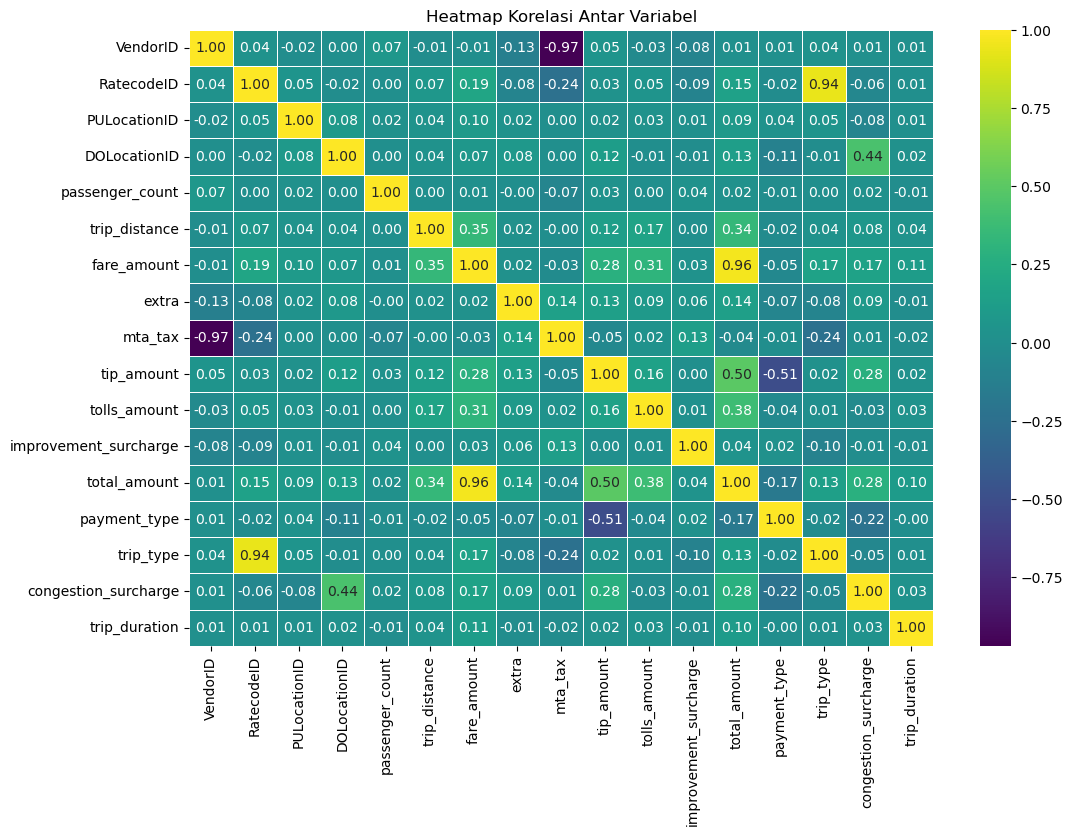

In [38]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

misalkan jika nilai korelasinya lebih dari atau sama dengan 0.40 (>= 0.40) maka memiliki korelasi meskipun tidak signifikan. dari heatmap diatas, bisa dilihat bahwa ada beberapa variabel yang memiliki korelasi kuat dengan variabel lainnya, yaitu
* `RatecodeID` dan `trip_type` sebesar 0.94
* `DOLocationID` dan `congestion_surcharge`   sebesar 0.44
* `fare_amount` dan `total_amount` sebesar 0.96
* `tip_amount` dan `total_amount` sebesar 0.50



**Membuat kolom baru untuk setiap datetime**

In [39]:
# cari pickup dan drop month
df['pickup_month'] = df['lpep_pickup_datetime'].dt.month_name()
df['dropoff_month'] = df['lpep_dropoff_datetime'].dt.month_name()

In [40]:
# cari pickup dan dropoff
df['pickup_day'] = df['lpep_pickup_datetime'].dt.day
df['dropoff_day'] = df['lpep_dropoff_datetime'].dt.day

In [41]:
# creating pickup and dropoff weekdays
df['pickup_weekday'] = df['lpep_pickup_datetime'].dt.day_name()
df['dropoff_weekday'] = df['lpep_dropoff_datetime'].dt.day_name()

In [42]:
# membuat kolom baru, yaitu `pickup_hour`
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['dropoff_hour'] = df['lpep_dropoff_datetime'].dt.hour

In [43]:
# driving the time in to different timezone
def timezone(x):
    if x >= 6 and x <= 10:
        return 'morning'
    elif x >= 10 and x < 16:
        return 'mid day'
    elif x >= 16 and x < 22:
        return 'evening'
    elif x >= 22 or x < 6:
        return 'late night'
    
# apply that function
df['pickup_timezone'] = df.pickup_hour.apply(timezone)
df['dropoff_timezone'] = df.dropoff_hour.apply(timezone)

**Konversi numerik menjadi kategorik**

In [44]:
# nama vendor
df['VendorName'] = df['VendorID'].replace({1: 'Creative Mobile Technologies, LLC.', 2: 'VeriFone Inc.'})

In [45]:
# rate code ID
df['RatecodeName'] = df['RatecodeID'].replace({1 : 'tarif standar', 
                                               2 : 'tarif ke bandara JFK',
                                               3 : 'tarif ke bandara Newark',
                                               4 : 'tarif ke Nassau atau Westchester',
                                               5 : 'tarif negosiasi',
                                               6 : 'tarif perjalanan kelompok'
})

In [46]:
# payment type
df['payment_typeName'] = df['payment_type'].replace({1 : 'kartu kredit',
                                                     2 : 'tunai',
                                                     3 : 'tidak dikenakan biaya',
                                                     4 : 'perselisihan',
                                                     5 : 'tidak diketahui',
                                                     6 : 'perjalanan dibatalkan'
})

In [47]:
# congestion surcharge
df['trip_typeName'] = df['trip_type'].replace({1 : 'street-hail ',
                                               2 : 'dispatch',
})

# **Data Analysis**

## **Pola perjalanan taksi berdasarkan waktu dan lokasi**

**Bagaimana pola perjalanan taksi berdasarkan waktu dan lokasi?**
* Kapan waktu sibuk untuk perjalanan taksi?
* Lokasi mana yang paling sering menjadi titik penjemputan dan tujuan?


**Jumlah pickup berdasarkan zona waktu dalam sehari**

Melihat distribusi perjalanan berdasarkan zona waktu dalam sehari.

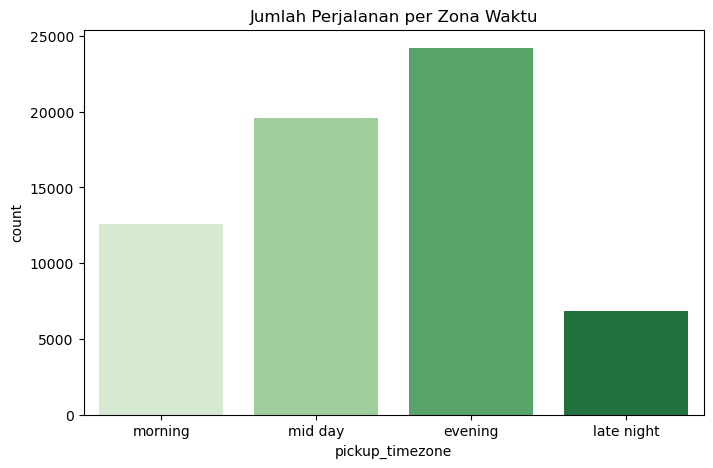

In [48]:
# distribution of the no of pickups in a day
plt.figure(figsize=(8,5))
sns.countplot(x='pickup_timezone', data = df, order=['morning', 'mid day', 'evening', 'late night'], palette='Greens')
plt.title('Jumlah Perjalanan per Zona Waktu')
plt.show()

**Observasi**
Grafik menunjukkan distribusi perjalanan berdasarkan zona waktu. Jumlah perjalanan tertinggi terjadi pada sore ke malam (evening), diikuti oleh siang (mid day), pagi (morning), dan paling sedikit pada larut malam (late night). Ini menunjukkan bahwa peningkatan permintaan transportasi seiring berjalannya hari dengan lonjakan yang signifikan pada sore ke malam dan penurunan yang signifikan pada larut malam.

**Intepretasi**
Kebutuhan transportasi mencapai puncaknya pada sore ke malam, kemungkinan karena adanya banyak orang pulang kerja, sekolah, atau selesai beraktivitas yang lainnya. Sementara itu, jumlah perjalanan yang paling rendah pada larut malam yang dapat disebabkan oleh berkurangnya aktivitas masyarakat di jam-jam tersebut. Hal ini dapat menjadi pertimbangan bagi layanan transportasi untuk menyesuaikan ketersediaan kendaraan sesuai dengan lonjakan permintaan waktu tertentu.

**Jumlah Pejalanan per Jam**

Melihat jumlah perjalanan berdasarkan jam untuk mengidentifikasi jam-jam sibuk.

In [49]:
hitung_jam = df['pickup_hour'].value_counts().sort_index()

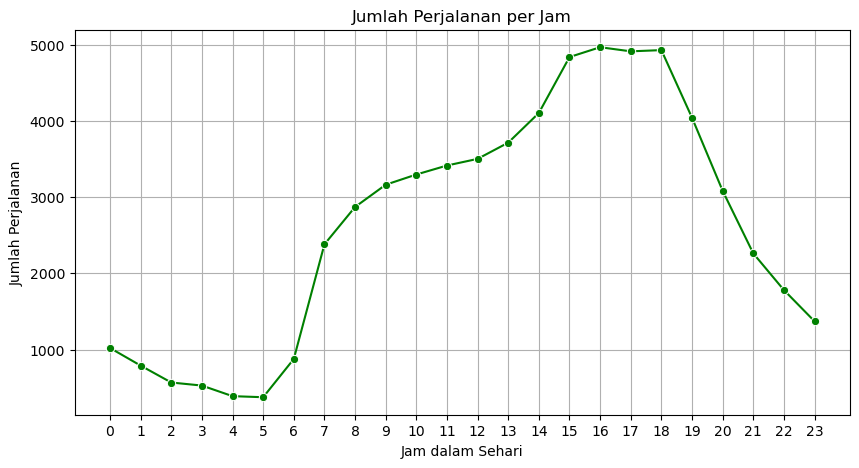

In [50]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=hitung_jam.index, y=hitung_jam.values, marker='o', linestyle='-', color='green')
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Perjalanan")
plt.title("Jumlah Perjalanan per Jam")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Observasi**
Grafik ini menunjukkan jumlah perjalanan per jam dalam sehari. Pada pagi hari, jam sibuk dimulai sekitar pukul 6 - 9. Jam sibuk lainnya terjadi pada sore hari, sekitar pukul 4 - 6 sore. Setelah jam sibuk sore, jumlah perjalanan mulai menurun tajam dan terus berkurang hingga larut malam.

**Intepretasi**
Ritme aktivitas masyarakat tercerminkan dengan peningkatan perjalanan di pagi hari yang kemungkinan besar terkait dengan mobilitas kerja dan sekolah, atau aktivitas lainnya. Puncak perjalanan pada sore hingga awal malam menunjukkan tingginya aktivitas pulang kerja atau kegiatan lain setelah jam kerja. Penurunan tajam yang terjadi setelah jam sibuk menunjukkan berkurangnya kebutuhan transportasi saat malam tiba, yang bisa menjadi peluang bagi layanan penyedia transportasi untuk menyesuaikan jumlah armada berdasarkan jam-jam dengan permintaan tinggi dan rendah. 

**Jumlah Perjalanan per Hari dalam Seminggu**

Melihat jumlah perjalanan berdasarkan hari dalam seminggu.

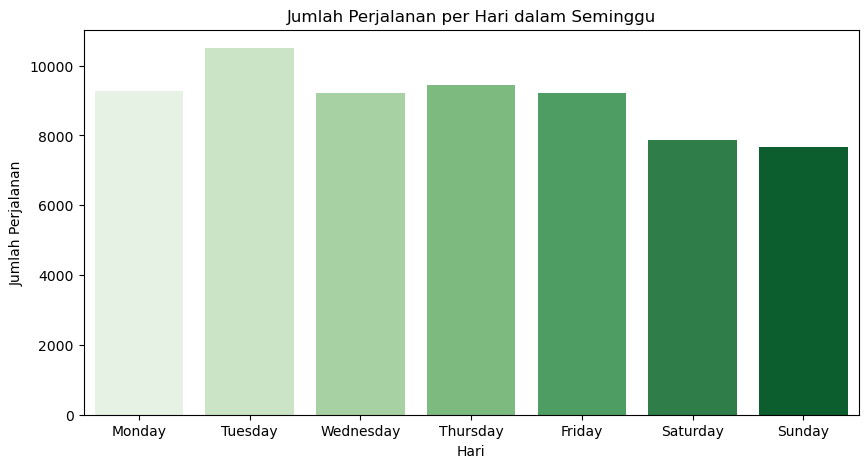

In [51]:
# Pola perjalanan per hari
plt.figure(figsize=(10,5))
sns.countplot(x=df['pickup_weekday'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Greens')
plt.xlabel("Hari")
plt.ylabel("Jumlah Perjalanan")
plt.title("Jumlah Perjalanan per Hari dalam Seminggu")
plt.show()

**Observasi**
Grafik menunjukkan jumlah perjalanan per hari dalam seminggu. Jumlah perjalanan tertinggi terjadi pada hari Selasa. Setelah itu, jumlah perjalanan cenderung stabil dari hari Rabu hingga Jumat. Pada akhir pekan, jumlah perjalanan mengalami penurunan dengan angka terendah pada hari Minggu.

**Intepretasi**
Perjalanan terjadi lebih banyak pada hari kerja, kemungkinan karena aktivitas rutin seperti bekerja dan sekolah. Sementara itu, penurunan jumlah perjalanan yang terjadi di akhir pekan dapat disebabkan oleh berkurangnya aktivitas dan mobilitas harian, di mana orang lebih banyak menghabiskan waktu di rumah atau melakukan perjalanan dengan transportasi lainnya.

**Identifikasi Zona Pickup & Dropoff Paling Ramai**

mengidentifikasi zona pickup dan dropoff paling ramai 10 teratas.

In [95]:
# hitung zona pickup yang paling ramai
pickup_zone_counts = df['pickup_zone'].value_counts().head(10)
pickup_zone_counts

East Harlem North           12921
East Harlem South           8828 
Forest Hills                3798 
Central Harlem              3725 
Morningside Heights         3592 
Elmhurst                    2856 
Central Park                2850 
Fort Greene                 2126 
Astoria                     1807 
Washington Heights South    1610 
Name: pickup_zone, dtype: int64

In [53]:
# hitung zona dropoff yang paling ramai
dropoff_zone_counts = df['dropoff_zone'].value_counts().head(10)
dropoff_zone_counts

East Harlem South        3415
East Harlem North        3297
Upper East Side North    2656
Central Harlem           2529
Central Harlem North     2247
Upper West Side North    2239
Morningside Heights      2179
Forest Hills             1595
Yorkville West           1511
Upper West Side South    1403
Name: dropoff_zone, dtype: int64

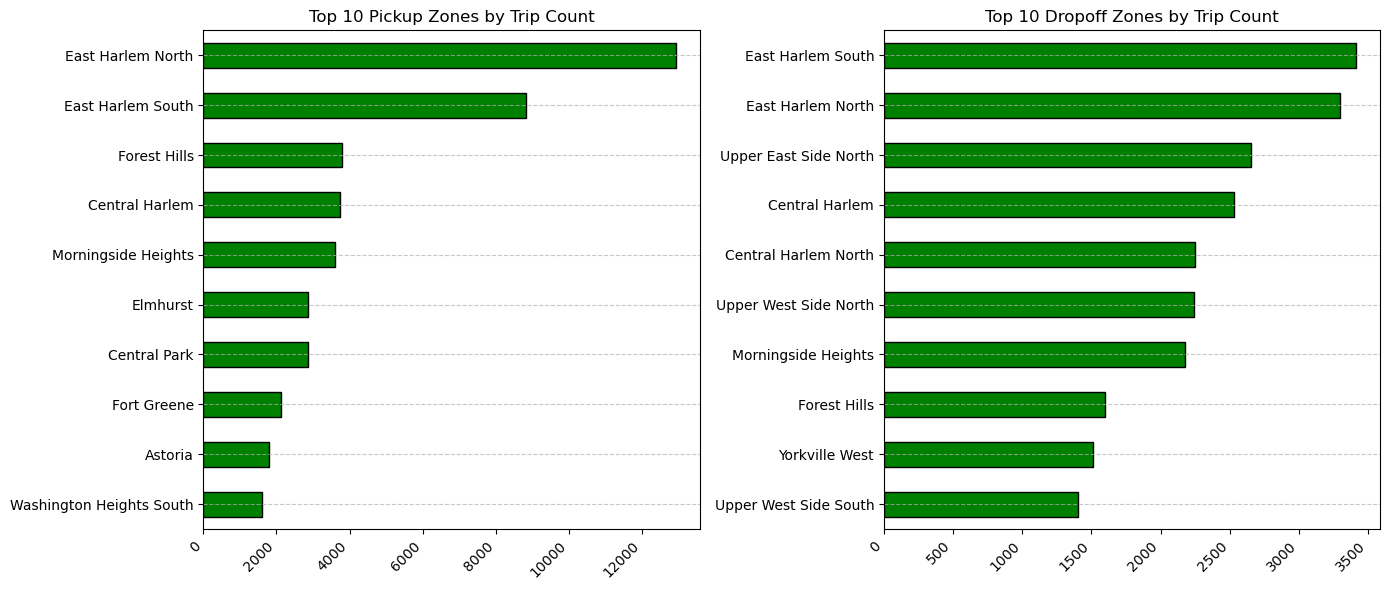

In [54]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
pickup_zone_counts.sort_values().plot(kind='barh', color='green', edgecolor='black')
plt.title("Top 10 Pickup Zones by Trip Count")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
dropoff_zone_counts.sort_values().plot(kind='barh', color='green', edgecolor='black')
plt.title("Top 10 Dropoff Zones by Trip Count")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Observasi**
Grafik menunjukkan 10 zona penjemputan dan 10 zona penurunan yang paling ramai. Zona penjemputan (pickup) dan pengantaran (dropoff) tertinggi didominasi oleh wilayah-wilayah seperti East Harlem North dan East Harlem South. Zona East Harlem North menjadi lokasi paling sering digunakan untuk penjemputan, sementara zona East Harlem South menjadi tujuan penurunan yang paling umum. Beberapa zona yang muncul di kedua grafik menunjukkan konsistensi dalam aktivitas transportasi di area tersebut.

**Intepretasi**
Beberapa zona memiliki peran ganda, sebagai titik awal dan akhir perjalanan. Hal ini mengindikasikan bahwa area tersebut memiliki kepadatan aktivitas atau mobilitas yang tinggi. East Harlem North menempati posisi tertinggi dalam penjemputan menunjukkan bahwa area tersebut merupakan tempat keberangkatan utama, kemungkinan karena banyaknya tempat tinggal atau pusat aktivitas. Sebaliknya, East Harlem South sebagai zona penurunan yang menceriminkan adanya tujuan penting seperti fasilitas umum, pusat bisnis, atau tempat tinggal. Kesesuaian antara penjemputan dan penurunan di beberapa zona ini bisa menunjukkan adanya rute-rute perjalanan yang umum dan berulang. 

## **Efisiensi Vendor dalam Menghasilkan Pendapatan**

**Bagaimana efisiensi vendor dalam menghasilkan pendapatan?**

* Berapa jumlah perjalanan dan total pendapatan dari masing-masing vendor?
* Vendor mana yang lebih efisien dalam menghasilkan pendapatan per perjalanan?



**Perbandingan Jumlah Perjalanan Antar Vendor**

Membandingkan jumlah perjalanan per vendor.

In [100]:
total_trip_per_vendor = df['VendorName'].value_counts().reset_index()
total_trip_per_vendor.columns = ['VendorName', 'total trips']
total_trip_per_vendor

,VendorName,total trips
0,VeriFone Inc.,54124
1,"Creative Mobile Technologies, LLC.",9058


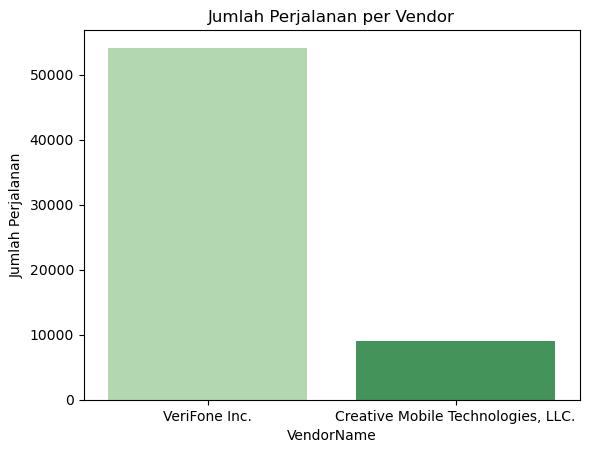

In [101]:
sns.barplot(x='VendorName', y='total trips', data=total_trip_per_vendor, palette='Greens')
plt.title('Jumlah Perjalanan per Vendor')
plt.ylabel('Jumlah Perjalanan')
plt.show()

**Observasi**
Grafik menunjukkan jumlah perjalanan per vendor. Jumlah perjalanan oleh vendor VeriFone Inc. jauh lebih tinggi dibandingkan dengan Creative Mobile Technologies, LLC. VeriFone Inc. memiliki lebih dari 50.000 perjalanan, sementara Creative Mobile Technologies, LLC hanya memiliki kurang dari 10.000 perjalanan.

**Intepretasi**
Dominasi VeriFone Inc. dalam jumlah perjalanan menunjukkan bahwa mereka memiliki pangsa pasar yang jauh lebih besar dalam layanan transportasi ini dibandingkan dengan Creative Mobile Technologies, LLC. Hal ini bisa disebabkan oleh faktor seperti jangkauan layanan yang luas, kemudahan untuk mendapatkan armada, atau preferensi pelanggan. Sementara itu, Creative Mobile Technologies, LLC mungkin perlu meningkatkan strategi pemasaran atau memperluas jangkauan layanan untuk bersaing lebih efektif. 

**Perbandingan Total Pendapatan Antar Vendor**

Membandingkan total pendapatan antara vendor.

In [102]:
# total pendapatan per vendor
pendapatan_per_vendor = df.groupby("VendorName")[["fare_amount", "tip_amount"]].sum().reset_index()
pendapatan_per_vendor["total_pendapatan"] = pendapatan_per_vendor["fare_amount"] + pendapatan_per_vendor["tip_amount"]
pendapatan_per_vendor

,VendorName,fare_amount,tip_amount,total_pendapatan
0,"Creative Mobile Technologies, LLC.",145504.89,15232.19,160737.08
1,VeriFone Inc.,859047.02,113402.76,972449.78


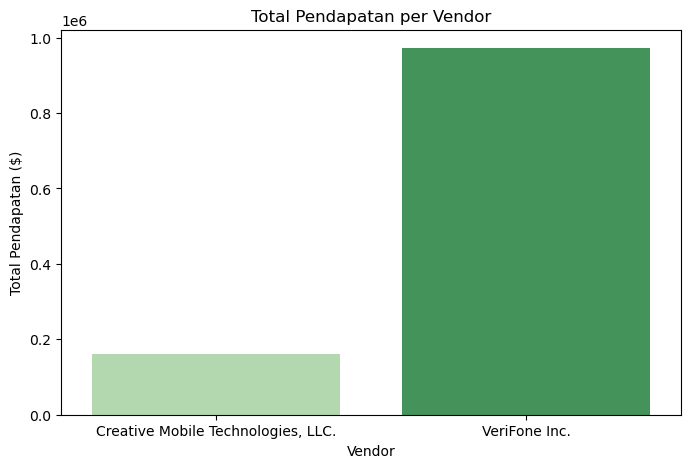

In [103]:
plt.figure(figsize=(8,5))
sns.barplot(x="VendorName", y="total_pendapatan", data=pendapatan_per_vendor, palette="Greens")
plt.title("Total Pendapatan per Vendor")
plt.xlabel("Vendor")
plt.ylabel("Total Pendapatan ($)")
plt.show()

**Observasi**
Grafik menunjukkan total pendapatan per vendor. Total pendapatan VeriFone Inc. jauh lebih tinggi dibandingkan dengan Creative Mobile Technologies, LLC. VeriFone Inc. mengasilkan hampir $1.000.000, sementara Creative Mobile Technologies hanya mengasilkan kurang dari $200.000.

**Intepretasi**
Perbedaan signifikan dalam pendapatan ini mencerminkan dominasi VeriFone Inc. yang kemungkinan besar terkait dengan jumlah perjalanan yang jauh lebih tinggi dibandingkan dengan pesaingnya. Ini bisa mengindikasikan bahwa lebih banyak pelanggan memilih VeriFone Inc. baik karena layanan, jangkauan, maupun kemudahan untuk mendapatkan armadanya. Sementara itu, Creative Mobile Technologies, LLC. mungkin perlu meningkatkan strategi pemasaran atau memperluas layananan untuk meningkatkan pendapatan. 

**Efisiensi Vendor dalam Menghasilkan Pendapatan**

Untuk mengukur efisiensi, kita bisa melihat rata-rata pendapatan per perjalanan.

In [59]:
# jumlah perjalanan per vendor
vendor_counts = df['VendorName'].value_counts()

In [104]:
vendor_efficiency = pendapatan_per_vendor.merge(total_trip_per_vendor, on='VendorName')
vendor_efficiency['pendapatan_per_trip'] = vendor_efficiency['fare_amount'] / vendor_efficiency['total trips']
vendor_efficiency

,VendorName,fare_amount,tip_amount,total_pendapatan,total trips,pendapatan_per_trip
0,"Creative Mobile Technologies, LLC.",145504.89,15232.19,160737.08,9058,16.063688
1,VeriFone Inc.,859047.02,113402.76,972449.78,54124,15.871832


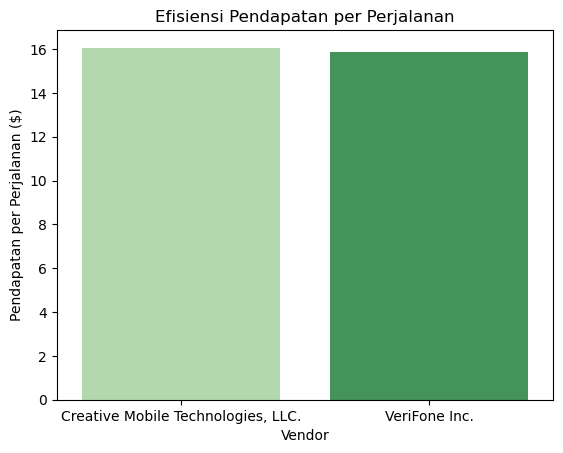

In [61]:
sns.barplot(x='VendorName', y='pendapatan_per_trip', data=vendor_efficiency, palette='Greens')
plt.title('Efisiensi Pendapatan per Perjalanan')
plt.xlabel('Vendor')
plt.ylabel('Pendapatan per Perjalanan ($)')
plt.show()

**Observasi**
Grafik menunjukan efisiensi pendapatan per perjalanan. Pendapatan per perjalanan dari Creative Mobile Technologies LLC. sedikit lebih tinggi dibandingkan dengan VeriFone Inc., yaitu sekitar $16 per perjalanan.

**Intepretasi**
Meskipun jumlah total perjalanan dan pendapatan VeriFone Inc. lebih tinggi, efisiensi pendapatan perjalanan dari kedua vendor ini cukup seimbang. Hal ini menunjukkan bahwa meskipun Creative Mobile Technologies LLC. memiliki volume perjalanan yang jauh lebih rendah dibandingkan dengan VeriFone Inc. Akan tetapi Creative Mobile Technologies LLC. justru mencatat pendapatan rata-rata per perjalanan yang sedikit lebih tinggi. Hal ini mengindikasikan bahwa meskipun volumenya lebih kecil, perjalanan yang difasilitasi oleh vendor ini cenderung menghasilkan nilai yang lebih besar per trip dan kemungkinan karena faktor seperti jarak tempuh yang lebih jauh atau tarif yang lebih tinggi.

## **Faktor-faktor yang mempengaruhi total biaya perjalanan**

**Bagaimana faktor-faktor yang mempengaruhi total biaya perjalanan?**
* Apakah ada korelasi antara jarak perjalanan, jumlah penumpang, biaya dasar perjalanan, biaya tambahan, biaya toll, tip, biaya kemacetan, dan total biaya?
* Bagaimana kontribusi biaya-biaya tambahan terhadap biaya total?

**Korelasi faktor terhadap total biaya**

In [ ]:
correlation = df[['trip_distance', 'passenger_count', 'fare_amount', 'extra', 
           'tolls_amount', 'tip_amount', 'congestion_surcharge', 'total_amount']].corr()

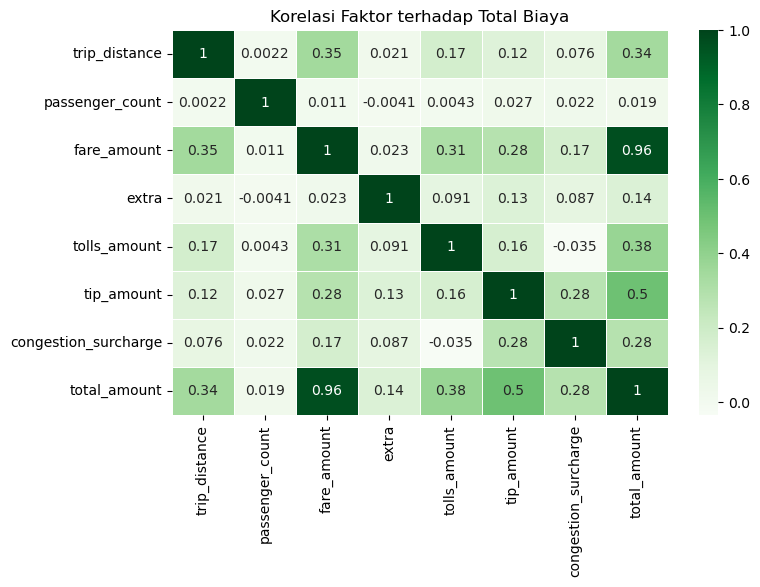

In [63]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap="Greens", linewidths=0.5)
plt.title("Korelasi Faktor terhadap Total Biaya")
plt.show()

**Observasi**
Heatmap ini menunjukkan korelasi antara faktor-faktor terhadap total biaya perjalanan (`total_amount`). 
1. `fare_amount` (0.96), memiliki korelasi paling tinggi, ini menunjukkan bahwa tarif dasar merupakan komponen utama dari total biaya.
2. `tip_amount` (0.5), cukup berkorelasi kuat dengan `total_amount`. Ini menunjukkan bahwa tip memberi kontribusi signifikan terhadap total biaya meskipun tidak sebesar tarif dasar.
3. `tolls_amount` (0.38), menunjukkan bahwa keberadaan tol dapat meningkatkan total biaya secara cukup konsisten.
4. `trip_distance` (0.34), menunjukkan bahwa semakin jauh perjalanan, umumnya semakin besar biaya total, tapi korelasinya tidak sekuat biaya dasar.
5. `congestion_surcharge` (0.28), biaya kemacetan tetap berpengaruh, tapi tidak dominan, sehingga korelasinya lemah.
6. `extra` (0.14), menunjukkan bahwa biaya tambahan tidak telalu berkorelasi dengan biaya total.
7. `passenger_count` (0.019), hapir tidak ada korelasinya. Jumlah penumpang tidak berdampak terhadap total biaya.

**Intepretasi**
Total biaya perjalanan terutama dipengaruhi oleh `fare_amount`, wajar karena tarif merupakan komponen utama dalam perhitungan biaya perjalanan. Selain itu, biaya tip dan biaya tol juga memiliki korelasi yang cukup signifikan terhadap total biaya perjalanan. Sebaliknya, jumlah penumpang tidak terlalu berkorelasi dengan biaya total perjalanan yang mungkin disebabkan oleh tarif dihitung per perjalanan bukan per individu. Hal ini menunjukkan bahwa faktor utama dalam peningkatan pendapatan bukanlah jumlah penumpang melainkan tarif dasar, tip, toll, dan tarif lain yang diberikan.

**Persentase kontribusi masing-masing faktor terhadap total biaya**

In [ ]:
factors = ['fare_amount', 'extra', 'improvement_surcharge', 'mta_tax',
           'tolls_amount', 'tip_amount', 'congestion_surcharge'] 
factor_percentages = {factor: (df[factor].mean() / df['total_amount'].mean()) * 100 for factor in factors}
factor_percentages

{'fare_amount': 75.55406945568495,
 'extra': 4.233253632735116,
 'improvement_surcharge': 4.538635749037018,
 'mta_tax': 2.9993114743778335,
 'tolls_amount': 0.6621669254012255,
 'tip_amount': 9.674854878060568,
 'congestion_surcharge': 3.490820015626738}

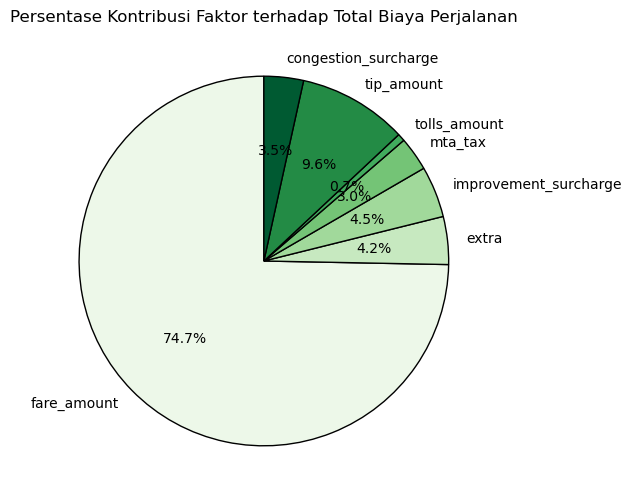

In [94]:
plt.figure(figsize=(8, 6))
plt.pie(
    factor_percentages.values(), 
    labels=factor_percentages.keys(), 
    autopct='%1.1f%%', 
    colors = ['#edf8e9', '#c7e9c0', '#a1d99b', '#74c476',
          '#41ab5d', '#238b45', '#005a32'], 
    startangle=90,
    wedgeprops={'edgecolor': 'black'},
)
plt.title('Persentase Kontribusi Faktor terhadap Total Biaya Perjalanan')
plt.show()

**Observasi**
Pie chart ini menunjukkan persentase kontribusi faktor terhadap total biaya perjalanan. Dari grafik dapat dilihat bahwa `fare_amount` memiliki kontribusi terbesar, yaitu 74.7% dari total biaya perjalanan. Faktor lain seperti `tip_amount` (9.6%), disusul oleh `improvement_surcharge ` (4.5%) `extra` (4.2%), dan `congestion_surcharge` (3.5%). Kontribusi paling kecil berasal dari `mta_tax` (3.0%) dan `tolls_amount` (0.7%) memiliki kontribusi yang jauh lebih kecil dibandingkan `fare_amount`.

**Intepretasi**
Komposisi ini menunjukkan bahwa mayoritas biaya perjalanan berasal dari tarif dasar perjalanan, yang merupakan komponen utama dalam penentuna total biaya. Sementara itu, faktor tambahan seperti tip, biaya tambahan, biaya kemacetan, dan biaya lainnya memiliki kontribusi yang lebih kecil. Hal ini menunjukkan bahwa strategi peningkatan pendapatan utama bergantung pada penyesuaian tarif dasar perjalanan, sementara faktor lain memiliki dampak yang relatif kecil terhadap keseluruhan biaya perjalanan.

## **Kesimpulan dan Rekomendasi**

**Kesimpulan** 

**Pola perjalanan taksi berdasarkan waktu dan lokasi**
* **Waktu Perjalanan:** 
    * Waktu sibuk terjadi pada dua periode yaitu pagi (6-9) dan sore hingga awal malam (4-6).
    * Pola perjalanan cenderung stabil dari Senin sampai Jumat, kemudian menurun signifikan pada akhir pekan.

* **Lokasi Perjalanan:**
    * Aktivitas transportasi tertinggi terpusat di zona East Harlem, baik untuk penjemputan maupun penurunan.
    * Beberapa zona berperan ganda, menunjukkan pola perjalanan yang berulang dan konsisten. 
    * Perjalanan taksi terutama digunakan untuk mendukung mobilitas harian masyarakat ke lokasi utama mereka beraktivitas.

**Efisiensi Vendor dalam Menghasilkan Pendapatan**
* VeriFone Inc. memliki jumlah perjalanan (50.000+) dan total pendapatan(~$1.000.000) jauh lebih tinggi dibandingan dengan Creative Mobile Technologies, LLC. (10.000 perjalanan, <$200.000)
* Creative Mobile Technologies, LLC. lebih efisien dakam menghasilkan pendapatan per perjalanan (~$16), sedikit lebih tinggi dibandingkan VeriFone Inc.

**Faktor-faktor yang mempengaruhi total biaya perjalanan**
* Total biaya perjalanan sangat dipengaruhi oleh tarif dasar perjalanan (`fare_amount`), dengan korelasi sebesar 0.96 dan kontribusi 80.7% dari total biaya.
* Biaya tambahan seperti `tip_amount` (10.3%), `extra` (4.5%), `congestion_surcharge` (3.7%), dan `tolls_amount` (0.7%) memiliki kontribusi lebih kecil terhadap total biaya.
* Jumlah penumpang (`passenger_count`) hampir tidak berpengaruh terhadap total biaya perjalanan (korelasi: 0.019), karena tarif dihitung per perjalanan, bukan per individu.
* Faktor seperti tip, biaya kemacetan, dan metode pembayaran dapat meningkatkan total biaya perjalanan, tetapi pengaruhnya lebih kecil.

**Rekomendasi Bisnis**

**Pola perjalanan taksi berdasarkan waktu dan lokasi**
* Optimasi armada sesuai waktu sibuk dengan menambahkan armada di waktu sibuk dan mengurangi di waktu larut malam, kecuali di daerah dengan permintaan tinggi.
* Distribusi armada berdasarkan lokasi dengan menambahkan kendaraan di kawasan pickup dan dropoff ramai atau menggunakan sistem berbasis data untuk menyesuaikan armada.
* Penyesuaian tarif pada jam sibuk untuk meningkatkan pendapatan dan insentif pengemudi agar pasokan kendaraan tetap terjaga.
* Pengembangan infrastruktur dan layanan dengan menyiapkan titik pickup atau dropoff di area dengan permintaan tinggi dan menggunakan fitur pemesanan.

**Efisiensi Vendor dalam Menghasilkan Pendapatan**
* Creative Mobile Technologies, LLC. dengan melakukan perluasan kemitraan, perkuat branding, dan tingkatkan layanan untu menarik lebih banyak pelanggan.
* VeriFone Inc. denganmeninjau kembali strategi tarif dan kembangkan layanan tambahan guna meningkatkan pendapatan.
* Kedua vendor dengan lebih fokus pada distribusi armada yang efisien dan perbaikan strategi operasional untuk memenuhi permintaan pasar.

**Faktor-faktor yang mempengaruhi total biaya perjalanan**
* Optimalisasi tarif dan pendapatan dengan mengevaluasi dan menyesuaikan tarif secara strategis, termasuk penerapan harga dinamis untuk memaksimalkan keuntungan.
* Meningkatkan kontribusi dari biaya tambahan dengan meningkatkan potensi pendapatan melalui fitur tipping, layanan premium, dan penyesuaian biaya tambahan. 
* Strategi pembayaran untuk meningkatkan pendapatan dengan mendorong pembayaran digital dan promo berbasis transaksi untuk meningkatkan loyalitas serta jumlah perjalanan.*